In [1]:
# pip install ForwardStepwiseFeatureSelection

In [2]:
# Import Packages
import pandas as pd
import xgboost as xgb
import time
import numpy as np
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from ForwardStepwiseFeatureSelection import ForwardStepwiseFeatureSelection

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Drop unnecessary column
iris.drop('Id', axis=1, inplace=True)
# Label the target
iris.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}, inplace=True)

In [5]:
# Splitting dataset into dataframes
from sklearn.model_selection import train_test_split

X = iris.drop('Species', axis=1)
y = iris[['Species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Standardizing the dataframes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [7]:
# instantiate the ML model
cls = xgb.XGBClassifier(verbosity=0, use_label_encoder=False )

# fit the training datasets into the model
cls.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [8]:
from sklearn.metrics import classification_report
y_pred = cls.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Searching the best subset of features with XGBClassifier...
-----------------------------------------------------------Trial 1-----------------------------------------------------------
1/4: ['SepalLengthCm']
      Accuracy: 0.62, Standard Deviation: 0.1208
 
2/4: ['SepalWidthCm']
      Accuracy: 0.48, Standard Deviation: 0.103
 
3/4: ['PetalLengthCm']
      Accuracy: 0.91, Standard Deviation: 0.049
 
4/4: ['PetalWidthCm']
      Accuracy: 0.93, Standard Deviation: 0.0678
 
Best Subset of Trial 1: 
     PetalWidthCm
 
Best Accuracy of Trial 1: 
     0.93
 
Time Spent for Trial 1: 1.26(s)
 
-----------------------------------------------------------Trial 2-----------------------------------------------------------
1/3: ['PetalWidthCm', 'SepalLengthCm']
      Accuracy: 0.92, Standard Deviation: 0.0678
 
2/3: ['PetalWidthCm', 'SepalWidthCm']
      Accuracy: 0.92, Standard Deviation: 0.0812
 
3/3: ['PetalWidthCm', 'PetalLengthCm']
      Accuracy: 0.93, Standard Deviation: 0.0678
 
Best Subs

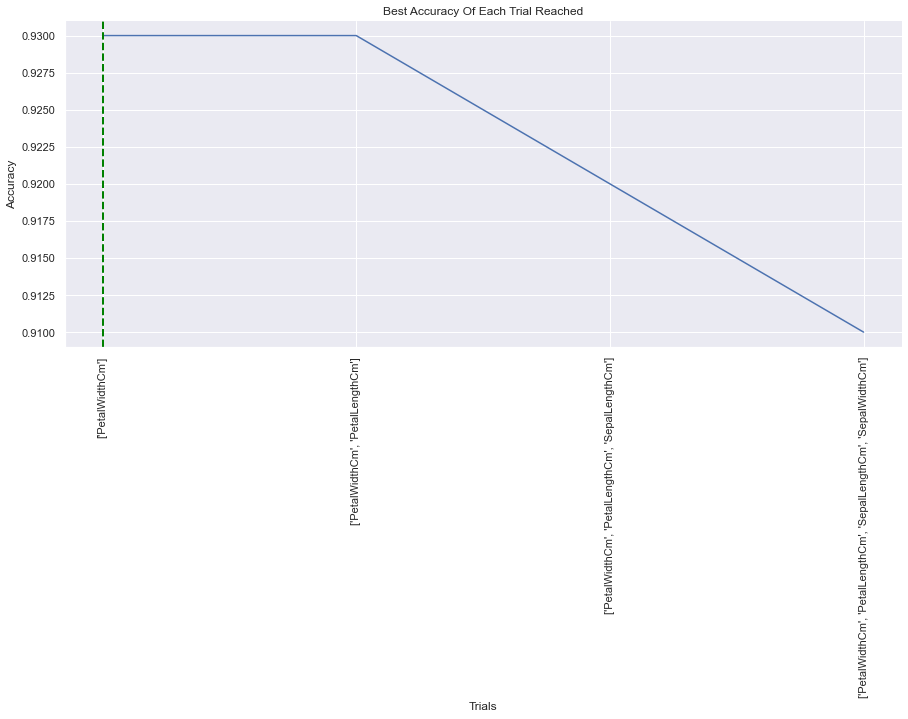

In [9]:
# Instantiate the ForwardStepwiseFeatureSelection class
fsfs = ForwardStepwiseFeatureSelection()
fsfs.fit(X_train, y_train)
fsfs.search(estimators=cls, cv=3, scoring='accuracy', verbose=1, tolerance=3)

In [13]:
fsfs.best_com

{'Trial 1': ['PetalWidthCm'],
 'Trial 2': ['PetalWidthCm', 'PetalLengthCm'],
 'Trial 3': ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm'],
 'Trial 4': ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm', 'SepalWidthCm']}

In [11]:
fsfs.summary

,Best Subset,Best accuracy,Time Spent
Trial 1,[PetalWidthCm],0.93,1.26
Trial 2,"[PetalWidthCm, PetalLengthCm]",0.93,0.76
Trial 3,"[PetalWidthCm, PetalLengthCm, SepalLengthCm]",0.92,0.49
Trial 4,"[PetalWidthCm, PetalLengthCm, SepalLengthCm, S...",0.91,0.24


In [12]:
# fit the training datasets with only the best features into the model
cls.fit(X_train[fsfs.best_subset], y_train)
y_pred = cls.predict(X_test[fsfs.best_subset])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.87      0.90        15
           2       0.88      0.94      0.91        16

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50

